Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast. 

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model. 
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note** 

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [230]:
from sklearn.preprocessing import OneHotEncoder

def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath, parse_dates=['Date'],
                     index_col='Date')
    
    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)
    
    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)
    
    # Drop high cardinality categoricals
    df = df.drop(columns=['Notes', 'Location', 'Address', 'URL', 'Neighborhood'])
    
    # Drop columns to prevent "leakage"
    df = df.drop(columns=['Rec', 'overall'])
    
    # Drop other irrelevent columns
    df = df.drop(columns = ['Mass (g)', 'Density (g/mL)', 'Length', 'Circum', 'Volume', 'Reviewer'])
    
    #drop google as it has too many nans
    df = df.drop('Google', axis=1)
    
    #Creating binary encoding and other cleaning
    for i in df.columns:
        if len(df[i].unique()) <= 7: # df[i].dtype == 'O'
            df[i] = df[i].fillna(0).astype(str).str.lower().replace('x', 1).replace('yes', 1).replace('no', 0).astype('float')
    
    #Sorting our the burritos
    top_4 = df['Burrito'].value_counts().index[:4]
    df['Burrito'] = [row if row in top_4 else 'Other' for row in df['Burrito']]

    
    return df

filepath = DATA_PATH + 'burritos/burritos.csv'



**Task 1:** Use the above `wrangle` function to import the `burritos.csv` file into a DataFrame named `df`.

In [231]:
filepath = DATA_PATH + 'burritos/burritos.csv'
df = wrangle(filepath)

df.head()

,Burrito,Yelp,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-18,California,3.5,0.0,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,California,3.5,0.0,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,Carnitas,0.0,0.0,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,Carne asada,0.0,0.0,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,California,4.0,1.0,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [232]:
df.columns

Index(['Burrito', 'Yelp', 'Chips', 'Cost', 'Hunger', 'Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'Unreliable', 'NonSD', 'Beef', 'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken', 'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion', 'Taquito', 'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Queso', 'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn', 'Zucchini', 'Great'], dtype='object')

In [233]:
df.dropna(axis=0).shape

(356, 52)

In [234]:
df.isna().sum().sum()

88

In [235]:
#Columns that still have NaNs:
nan_cols = [col for col in df.columns if df.isna().sum()[col] != 0]
nan_cols

['Cost',
 'Hunger',
 'Temp',
 'Meat',
 'Fillings',
 'Meat:filling',
 'Uniformity',
 'Salsa',
 'Synergy',
 'Wrap']

In [236]:
df.shape

(421, 52)

In [237]:
#Checking to see if we should keep any of the remaining NaN columns
for i in nan_cols:
    print(f'% of \'{i}\' column that is non-NaN: {(df[i].value_counts().sum() / df[i].size *100).round(2)}%')
#Result: These guys have mainly non-null values - I will impute the nulls further along

% of 'Cost' column that is non-NaN: 98.34%
% of 'Hunger' column that is non-NaN: 99.29%
% of 'Temp' column that is non-NaN: 95.25%
% of 'Meat' column that is non-NaN: 96.67%
% of 'Fillings' column that is non-NaN: 99.29%
% of 'Meat:filling' column that is non-NaN: 97.86%
% of 'Uniformity' column that is non-NaN: 99.52%
% of 'Salsa' column that is non-NaN: 94.06%
% of 'Synergy' column that is non-NaN: 99.52%
% of 'Wrap' column that is non-NaN: 99.29%


In [238]:
df.describe()

,Yelp,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
count,421.000000,421.000000,414.000000,418.000000,421.000000,401.000000,407.000000,418.000000,412.000000,419.000000,396.000000,419.000000,418.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.0,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,0.803325,0.059382,7.067343,3.495335,3.519477,3.783042,3.620393,3.539833,3.586481,3.428998,3.371970,3.586993,3.979904,0.078385,0.016627,0.425178,0.375297,0.365796,0.377672,0.301663,0.218527,0.121140,0.049881,0.049881,0.014252,0.085511,0.083135,0.026128,0.016627,0.016627,0.002375,0.019002,0.090261,0.016627,0.035629,0.040380,0.009501,0.016627,0.004751,0.009501,0.009501,0.002375,0.0,0.011876,0.007126,0.007126,0.004751,0.030879,0.007126,0.002375,0.432304
std,1.590489,0.236620,1.506742,0.812069,0.794438,0.980338,0.829254,0.799549,0.997057,1.068794,0.924037,0.886807,1.118185,0.269096,0.128022,0.494958,0.484776,0.482226,0.485382,0.459526,0.413739,0.326678,0.217959,0.217959,0.118668,0.279973,0.276415,0.159706,0.128022,0.128022,0.048737,0.136696,0.286897,0.128022,0.185585,0.197083,0.097125,0.128022,0.068842,0.097125,0.097125,0.048737,0.0,0.108459,0.084214,0.084214,0.068842,0.173195,0.084214,0.048737,0.495985
min,0.000000,0.000000,2.990000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.250000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.600000,3.000000,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,6.990000,3.500000,3.500000,4.000000,3.800000,3.500000,4.000000,3.500000,3.500000,3.800000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,7.880000,4.000000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.500000,1.000000,25.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [239]:
df['Burrito'].value_counts()

Other          242
California     101
Carne asada     29
California      26
Carnitas        23
Name: Burrito, dtype: int64

During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [240]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories. 

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [241]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

In [242]:
df.head()

,Burrito,Yelp,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-18,California,3.5,0.0,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,California,3.5,0.0,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,Carnitas,0.0,0.0,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,Carne asada,0.0,0.0,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,California,4.0,1.0,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [281]:
X = df.drop('Great', axis=1)
y = df['Great']
X.shape, y.shape

((421, 51), (421,))

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017. 
- Your test set should include data from 2018 and later.

In [282]:
cutoff = '2018-01-01'

X_train, y_train = X[X.index < cutoff], y[y.index < cutoff]
X_test, y_test = X[X.index >= cutoff], y[y.index >= cutoff]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((383, 51), (383,), (38, 51), (38,))

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents. 

In [312]:
from sklearn.metrics import accuracy_score
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)
baseline_acc = accuracy_score(y_train, y_pred)
print(f'Baseline Accuracy Score:, {round(baseline_acc*100,2)}%')

Baseline Accuracy Score:, 58.22%


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features, 
- a `SimpleImputer` transformer to deal with missing values, 
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and 
- a `LogisticRegression` predictor.

In [284]:
X_train

,Burrito,Yelp,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-18,California,3.5,0.0,6.49,3.0,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,California,3.5,0.0,5.45,3.5,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,Carnitas,0.0,0.0,4.85,1.5,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-24,Carne asada,0.0,0.0,5.25,2.0,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,California,4.0,1.0,6.59,4.0,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-05,California,0.0,0.0,6.85,3.5,3.0,4.5,3.8,3.8,4.0,3.5,3.5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-05,California,0.0,0.0,6.85,3.5,3.0,4.5,4.0,4.0,4.5,3.0,4.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-16,Other,4.0,1.0,11.50,3.5,2.0,2.0,4.0,3.5,3.0,4.5,3.5,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [285]:
import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

ohe = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = ohe.fit_transform(X_train)
X_test_encoded = ohe.transform(X_test)
X_train_encoded.shape, X_test_encoded.shape

/opt/anaconda3/envs/unit_2/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


((383, 55), (38, 55))

In [287]:
X_test.isna().sum().sum()

8

In [297]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_encoded.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test_encoded.columns)
X_train_imputed.isna().sum().sum()

0

In [298]:
X_train_imputed.describe()

,Burrito_California,Burrito_Carnitas,Burrito_Carne asada,Burrito_California,Burrito_Other,Yelp,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.0,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,0.067885,0.044386,0.070496,0.237598,0.579634,0.853003,0.065274,7.049867,3.496447,3.484073,3.743802,3.588679,3.521129,3.562747,3.416667,3.344875,3.570210,3.988451,0.078329,0.018277,0.456919,0.394256,0.381201,0.402089,0.323760,0.232376,0.122715,0.052219,0.054830,0.015666,0.091384,0.083551,0.028721,0.018277,0.018277,0.002611,0.020888,0.099217,0.015666,0.039164,0.044386,0.010444,0.018277,0.002611,0.010444,0.010444,0.002611,0.0,0.010444,0.007833,0.007833,0.005222,0.033943,0.007833,0.002611
std,0.251878,0.206221,0.256316,0.426168,0.494263,1.626606,0.247332,1.507100,0.806255,0.786915,0.949612,0.820966,0.804849,0.979768,1.057529,0.904762,0.892038,1.108049,0.269040,0.134126,0.498792,0.489329,0.486317,0.490961,0.468522,0.422900,0.328539,0.222760,0.227946,0.124341,0.288531,0.277075,0.167239,0.134126,0.134126,0.051098,0.143196,0.299344,0.124341,0.194240,0.206221,0.101793,0.134126,0.051098,0.101793,0.101793,0.051098,0.0,0.101793,0.088272,0.088272,0.072168,0.181318,0.088272,0.051098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.990000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.250000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,3.000000,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.990000,3.500000,3.500000,4.000000,3.588679,3.500000,3.800000,3.500000,3.500000,3.800000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.750000,4.000000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00

In [302]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.fit_transform(X_test_imputed)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_imputed.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_imputed.columns)
X_train_scaled.describe()

,Burrito_California,Burrito_Carnitas,Burrito_Carne asada,Burrito_California,Burrito_Other,Yelp,Chips,Cost,Hunger,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
count,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,3.830000e+02,3.830000e+02,383.000000,383.0,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02,3.830000e+02
mean,6.957011e-18,-4.638007e-17,-4.638007e-17,6.957011e-17,4.638007e-18,-1.391402e-17,-5.101808e-17,1.947963e-16,5.009048e-16,-4.591627e-16,2.875565e-16,1.623303e-16,-2.365384e-16,-7.096151e-16,1.345022e-16,3.478506e-16,4.788743e-16,-8.348413e-17,-1.855203e-17,1.623303e-17,1.113122e-16,-3.710406e-17,-3.710406e-17,0.000000,-1.484162e-16,1.391402e-16,-5.101808e-17,-2.550904e-17,-2.782804e-17,4.174207e-17,-9.276015e-18,0.000000,-9.276015e-18,4.174207e-17,3.246605e-17,-4.638007e-18,5.217758e-18,6.725111e-17,2.782804e-17,2.319004e-17,-8.348413e-17,-7.420812e-17,9.276015e-18,0.000000,-6.493210e-17,-3.710406e-17,0.000000,0.0,-7.420812e-17,1.855203e-17,2.087103e-17,-1.391402e-17,-1.669683e-16,9.276015e-18,-4.638007e-18
std,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308,1.001308e+00,1.001308e+00,1.001308,0.0,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00,1.001308e+00
min,-2.698687e-01,-2.155182e-01,-2.753955e-01,-5.582507e-01,-1.174258e+00,-5.250922e-01,-2.642582e-01,-2.697350e+00,-3.721364e+00,-3.160853e+00,-2.893171e+00,-3.157335e+00,-3.136523e+00,-3.130079e+00,-3.235027e+00,-3.701803e+00,-2.885048e+00,-3.604234e+00,-2.915233e-01,-1.364442e-01,-9.172492e-01,-8.067602e-01,-7.848782e-01,-0.820054,-6.919281e-01,-5.502010e-01,-3.740066e-01,-2.347263e-01,-2.408548e-01,-1.261551e-01,-3.171352e-01,-0.301941,-1.719590e-01,-1.364442e-01,-1.364442e-01,-5.116445e-02,-1.460593e-01,-3.318809e-01,-1.261551e-01,-2.018932e-01,-2.155182e-01,-1.027331e-01,-1.364442e-01,-0.051164,-1.027331e-01,-1.027331e-01,-0.051164,0.0,-1.027331e-01,-8.885233e-02,-8.885233e-02,-7.245236e-02,-1.874437e-01,-8.885233e-02,-5.116445e-02
25%,-2.698687e-01,-2.155182e-01,-2.753955e-01,-5.582507e-01,-1.174258e+00,-5.250922e-01,-2.642582e-01,-5.314266e-01,-6.165506e-01,-6.159576e-01,-7.842934e-01,-7.179946e-01,-6.483335e-01,-5.751183e-01,-8.679341e-01,-3.816766e-01,-6.400579e-01,-4.413977e-01,-2.915233e-01,-1.364442e-01,-9.172492e-01,-8.067602e-01,-7.848782e-01,-0.820054,-6.919281e-01,-5.502010e-01,-3.740066e-01,-2.347263e-01,-2.408548e-01,-1.261551e-01,-3.171352e-01,-0.301941,-1.719590e-01,-1.364442e-01,-1.364442e-01,-5.116445e-02,-1.460593e-01,-3.318809e-01,-1.261551e-01,-2.018932e-01,-2.155182e-01,-1.027331e-01,-1.364442e-01,-0.051164,-1.027331e-01,-1.027331e-01,-0.051164,0.0,-1.027331e-01,-8.885233e-02,-

In [313]:
model_logr = LogisticRegressionCV()
model_logr.fit(X_train_scaled, y_train)
y_pred_train = model_logr.predict(X_train_scaled)
y_pred = model_logr.predict(X_test_scaled)

/opt/anaconda3/envs/unit_2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/unit_2/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

0.6842105263157895

# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_lr`.

In [314]:
training_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred)

print('Training MAE:', training_acc)
print('Test MAE:', test_acc)

Training MAE: 0.9086161879895561
Test MAE: 0.6842105263157895


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_lr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

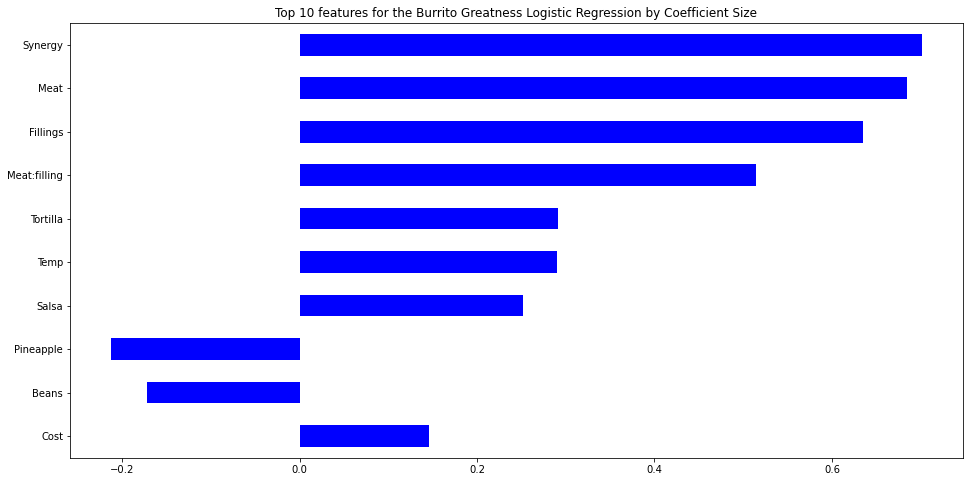

In [326]:
# Create your horizontal barchart here.
coefficients = pd.Series(model_logr.coef_[0], X_train_scaled.columns)
coefficients = coefficients.reindex(coefficients.abs().sort_values(ascending=True).index)[-10:]
plt.figure(figsize=(16,8))
coefficients.plot.barh(color='blue')
plt.title('Top 10 features for the Burrito Greatness Logistic Regression by Coefficient Size')
plt.show()

There is more than one way to generate predictions with `model_lr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [331]:
# Write code here to explore the differences between `predict` and `predict_proba`.
y_pred = model_logr.predict(X_test_scaled)
y_pred_proba = model_logr.predict_proba(X_test_scaled)
y_pred, y_pred_proba

(array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        0., 0., 1., 1.]),
 array([[0.02751234, 0.97248766],
        [0.188918  , 0.811082  ],
        [0.99266342, 0.00733658],
        [0.01106653, 0.98893347],
        [0.98326043, 0.01673957],
        [0.93160271, 0.06839729],
        [0.53691583, 0.46308417],
        [0.07496341, 0.92503659],
        [0.76328916, 0.23671084],
        [0.46061596, 0.53938404],
        [0.74281056, 0.25718944],
        [0.9686767 , 0.0313233 ],
        [0.72978493, 0.27021507],
        [0.76378488, 0.23621512],
        [0.55667963, 0.44332037],
        [0.56444612, 0.43555388],
        [0.56260525, 0.43739475],
        [0.97865591, 0.02134409],
        [0.98735033, 0.01264967],
        [0.98154013, 0.01845987],
        [0.97024919, 0.02975081],
        [0.31694885, 0.68305115],
        [0.88000846, 0.11999154],
        [0.80445818, 0.19554182],
      

In [333]:
y_pred.shape, y_pred_proba.shape

((38,), (38, 2))

**Give your written answer here:**

```

What data type do predict and predict_proba output?
They both output arrays, though y_pred_proba is a nested array (a matrix) as each prediction has a list indicating the probability of one class vs the other

What are the shapes of their different output?
(38,) and (38, 2)

What numerical values are in the output?
In y_pred they are a discrite numver {0, 1} that indicates whether the model predicts the observation burrito was tasty or not. 
y_pred_proba shows the probability it assigns to each class.

What do those numerical values represent?
y_pred {0, 1}: whether the burrito was great or not
y_pred_proba ((0<y<1), (0<y<1)): the probability of the burrito belonging to either class

```